# 12월 1일 수 공부

In [6]:
import warnings
warnings.filterwarnings("ignore")

## 7. 랜덤 포레스트

### 7-1. 분류(Classification)

In [34]:
# 분류 데이터
import pandas as pd
data = pd.read_csv('/Users/yerim/Desktop/빅데이터분석기사/BigData_data_최종본(1022)/breast-cancer-wisconsin.csv', encoding='utf-8')
data.info()

X = data[data.columns[1:10]]
y = data[['Class']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42)


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   code                         683 non-null    int64
 1   Clump_Thickness              683 non-null    int64
 2   Cell_Size                    683 non-null    int64
 3   Cell_Shape                   683 non-null    int64
 4   Marginal_Adhesion            683 non-null    int64
 5   Single_Epithelial_Cell_Size  683 non-null    int64
 6   Bare_Nuclei                  683 non-null    int64
 7   Bland_Chromatin              683 non-null    int64
 8   Normal_Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [11]:
# 모델 적용
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_scaled_train, y_train)

pred_train = model.predict(X_scaled_train)
pred_test = model.predict(X_scaled_test)

print("훈련 데이터 점수 : " , model.score(X_scaled_train, y_train))
print("테스트 데이터 점수 : " , model.score(X_scaled_test, y_test))

훈련 데이터 점수 :  1.0
테스트 데이터 점수 :  0.9649122807017544


In [13]:
# 오차행렬
from sklearn.metrics import confusion_matrix
conf_train = confusion_matrix(y_train, pred_train)
conf_test = confusion_matrix(y_test, pred_test)

print("훈련 데이터 오차 행렬 : \n" , conf_train)
print("테스트 데이터 오차 행렬 : \n ", conf_test)

훈련 데이터 오차 행렬 : 
 [[333   0]
 [  0 179]]
테스트 데이터 오차 행렬 : 
  [[106   5]
 [  1  59]]


In [14]:
# 상세 지표
from sklearn.metrics import classification_report

cfr_train = classification_report(y_train, pred_train)
cfr_test = classification_report(y_test, pred_test)

print("훈련 데이터 상세 평가 지표 : \n" , cfr_train)
print("테스트 데이터 상세 평가 지표 : \n" , cfr_test)

훈련 데이터 상세 평가 지표 : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       1.00      1.00      1.00       179

    accuracy                           1.00       512
   macro avg       1.00      1.00      1.00       512
weighted avg       1.00      1.00      1.00       512

테스트 데이터 상세 평가 지표 : 
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       111
           1       0.92      0.98      0.95        60

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



In [17]:
# grid search
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators' : range(100,1000,100) , 
             'max_features' : ['auto' , 'sqrt', 'log2']}
grid_search = GridSearchCV(model, parameters, cv=5)
grid_search.fit(X_scaled_train,y_train)

print("Best Params : " , grid_search.best_params_)
print("Best Score : " , grid_search.best_score_)
print("Test score : ", grid_search.score(X_scaled_test, y_test))

Best Params :  {'max_features': 'log2', 'n_estimators': 100}
Best Score :  0.9745859508852085
Test score :  0.9649122807017544


In [20]:
# random search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
parameters = {'n_estimators' : randint(low=100, high=1000) ,
             'max_features' : ['auto', 'sqrt' , 'log2']}

random_search = RandomizedSearchCV(model, param_distributions = parameters , cv=5, n_iter=20)
random_search.fit(X_scaled_train, y_train)

print("Best params : ", random_search.best_params_)
print("Best score : " , random_search.best_score_)
print("Test score : " , random_search.score(X_scaled_test, y_test))

Best params :  {'max_features': 'sqrt', 'n_estimators': 870}
Best score :  0.9745669141442985
Test score :  0.9649122807017544


### 7-2. 회귀

In [35]:
# 회귀 데이터
import pandas as pd
data = pd.read_csv('/Users/yerim/Desktop/빅데이터분석기사/BigData_data_최종본(1022)/house_price.csv', encoding='utf-8')
data.info()

X = data[data.columns[1:5]]
y = data[['house_value']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train)

X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17689 entries, 0 to 17688
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   housing_age  17689 non-null  int64  
 1   income       17689 non-null  float64
 2   bedrooms     17689 non-null  float64
 3   households   17689 non-null  float64
 4   rooms        17689 non-null  float64
 5   house_value  17689 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 829.3 KB


In [37]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_scaled_train, y_train)

pred_train = model.predict(X_scaled_train)
pred_test = model.predict(X_scaled_test)

print("훈련 데이터 : " , model.score(X_scaled_train, y_train))
print("테스트 데이터 : " , model.score(X_scaled_test, y_test))

훈련 데이터 :  0.9380791774575284
테스트 데이터 :  0.5828419065008211


In [38]:
# RMSE
from sklearn.metrics import mean_squared_error
import numpy as np
MSE_train = mean_squared_error(y_train, pred_train)
MSE_test = mean_squared_error(y_test, pred_test)

print("train RMSE : " , np.sqrt(MSE_train))
print("test RMSE : " , np.sqrt(MSE_test))

train RMSE :  23750.31654715196
test RMSE :  61746.566188176745


In [39]:
# grid search
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators' : range(100, 1000, 100), 
             'max_features' : ['auto' , 'sqrt' , 'log2']}

grid_search = GridSearchCV(model, parameters, cv=5)
grid_search.fit(X_scaled_train, y_train)

print("Best Params : " , grid_search.best_params_)
print("Best Score : " , grid_search.best_score_)
print("Test score : " , grid_search.score(X_scaled_test, y_test))

KeyboardInterrupt: 

In [ ]:
# random search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

parameters = {'n_estimators' : randint(low=100, high=1000),
             'max_features' : ['auto','sqrt','log2']}

random_search=RandomizedSearchCV(model, params_distributions = parameters, cv=5, n_iter=20)
random_search.fit(X_scaled_train, y_train)

print("Best Params : " , random_search.best_params_)
print("Best score : " , random_search.best_score_)
print("Test score : " , random_search.score(X_scaled_test, y_test))

## 8. 투표기반 앙상블

### 8-1. 분류

In [40]:
# 분류 데이터
import pandas as pd
data = pd.read_csv('/Users/yerim/Desktop/빅데이터분석기사/BigData_data_최종본(1022)/breast-cancer-wisconsin.csv', encoding='utf-8')
data.info()

X = data[data.columns[1:10]]
y = data[['Class']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42)


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   code                         683 non-null    int64
 1   Clump_Thickness              683 non-null    int64
 2   Cell_Size                    683 non-null    int64
 3   Cell_Shape                   683 non-null    int64
 4   Marginal_Adhesion            683 non-null    int64
 5   Single_Epithelial_Cell_Size  683 non-null    int64
 6   Bare_Nuclei                  683 non-null    int64
 7   Bland_Chromatin              683 non-null    int64
 8   Normal_Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [43]:
# 분류(Classifier) , 강한 학습기  : hard learner
# 학습기 선택 : 랜덤포레스트, 로지스틱모델, 서포트벡터모델
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# 모델 이름 설정
logit_model = LogisticRegression(random_state=42)
rnf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)

voting_hard = VotingClassifier(
                estimators = [('lr',logit_model), ('rf',rnf_model) , ('svc',svm_model)],
                voting = 'hard')

voting_hard.fit(X_scaled_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [46]:
from sklearn.metrics import accuracy_score

for clf in (logit_model, rnf_model, svm_model , voting_hard) : 
    clf.fit(X_scaled_train, y_train)
    y_pred = clf.predict(X_scaled_test)
    print(clf.__class__.__name__ , accuracy_score(y_test, y_pred))

LogisticRegression 0.9590643274853801
RandomForestClassifier 0.9649122807017544
SVC 0.9649122807017544
VotingClassifier 0.9649122807017544


In [50]:
# LogisticRegression confusion matrix

from sklearn.metrics import confusion_matrix

log_pred_train = logit_model.predict(X_scaled_train)
log_pred_test = logit_model.predict(X_scaled_test)

log_conf_train = confusion_matrix(y_train, log_pred_train)
log_conf_test = confusion_matrix(y_test, log_pred_test)

print("훈련 데이터 혼동행렬 : \n" , log_conf_train)
print("테스트 데이터 혼동행렬 : \n" , log_conf_test)

훈련 데이터 혼동행렬 : 
 [[328   5]
 [  9 170]]
테스트 데이터 혼동행렬 : 
 [[106   5]
 [  2  58]]


In [51]:
# SVM confusion matrix

svm_pred_train = svm_model.predict(X_scaled_train)
svm_pred_test = svm_model.predict(X_scaled_test)

svm_conf_train = confusion_matrix(y_train, svm_pred_train)
svm_conf_test = confusion_matrix(y_test, svm_pred_test)

print("훈련 데이터 혼동행렬 : \n" , svm_conf_train)
print("테스트 데이터 혼동행렬 : \n" , svm_conf_test)

훈련 데이터 혼동행렬 : 
 [[329   4]
 [  4 175]]
테스트 데이터 혼동행렬 : 
 [[106   5]
 [  1  59]]


In [53]:
# randomforest confusion matrix

rnf_pred_train = rnf_model.predict(X_scaled_train)
rnf_pred_test = rnf_model.predict(X_scaled_test)

rnf_conf_train = confusion_matrix(y_train, rnf_pred_train)
rnf_conf_test = confusion_matrix(y_test, rnf_pred_test)

print("훈련 데이터 혼동행렬 : \n" , rnf_conf_train)
print("테스트 데이터 혼동행렬 : \n" , rnf_conf_test)

훈련 데이터 혼동행렬 : 
 [[333   0]
 [  0 179]]
테스트 데이터 혼동행렬 : 
 [[106   5]
 [  1  59]]


In [54]:
# voting ensemble confusion matrix

voting_pred_train = voting_hard.predict(X_scaled_train)
voting_pred_test = voting_hard.predict(X_scaled_test)

voting_conf_train = confusion_matrix(y_train, voting_pred_train)
voting_conf_test = confusion_matrix(y_test, voting_pred_test)

print("훈련 데이터 혼동행렬 : \n" , voting_conf_train)
print("테스트 데이터 혼동행렬 : \n" , voting_conf_test)

훈련 데이터 혼동행렬 : 
 [[329   4]
 [  4 175]]
테스트 데이터 혼동행렬 : 
 [[106   5]
 [  1  59]]


In [61]:
# 분류(Classifier) , 약한 학습기  : soft learner
# 학습기 선택 : 랜덤포레스트, 로지스틱모델, 서포트벡터모델
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

logit_model = LogisticRegression(random_state = 42)
rnf_model = RandomForestClassifier(random_state=42)
SVM_model = SVC(random_state = 42)
voting_soft = VotingClassifier(
                estimators=[('lr',logit_model),('rnf',rnf_model),('svc',SVC_model)],
                voting='soft')

voting_soft.fit(X_scaled_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rnf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))],
                 voting='soft')

In [64]:
# 훈련 결과 보기 
from sklearn.metrics import accuracy_score
for clf in (logit_model , rnf_model, svm_model) : 
    clf.fit(X_scaled_train, y_train)
    y_pred = clf.predict(X_scaled_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9590643274853801
RandomForestClassifier 0.9649122807017544
SVC 0.9649122807017544


### 8-2. 회귀

In [65]:
# 회귀 데이터
import pandas as pd
data = pd.read_csv('/Users/yerim/Desktop/빅데이터분석기사/BigData_data_최종본(1022)/house_price.csv', encoding='utf-8')
data.info()

X = data[data.columns[1:5]]
y = data[['house_value']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train)

X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17689 entries, 0 to 17688
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   housing_age  17689 non-null  int64  
 1   income       17689 non-null  float64
 2   bedrooms     17689 non-null  float64
 3   households   17689 non-null  float64
 4   rooms        17689 non-null  float64
 5   house_value  17689 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 829.3 KB


In [74]:
# 회귀 투표기반 앙상블 모델 : VotingRegressor
# 사용 회귀 분류기 : 선형회귀모델, 랜덤포레스트
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

linear_model = LinearRegression()
rnf_model = RandomForestRegressor(random_state = 42)
voting_regressor = VotingRegressor(estimators = [('lr' , linear_model) , ('rf' , rnf_model)])

In [75]:
voting_regressor.fit(X_scaled_train, y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf', RandomForestRegressor(random_state=42))])

In [76]:
pred_train = voting_regressor.predict(X_scaled_train)
voting_regressor.score(X_scaled_train, y_train)

0.7962532705428835

In [77]:
pred_test = voting_regressor.predict(X_scaled_test)
voting_regressor.score(X_scaled_test, y_test)

0.5936371957936409

## 9. 배깅

### 9-1. 분류

In [8]:
# 분류 데이터
import pandas as pd
data = pd.read_csv('/Users/yerim/Desktop/빅데이터분석기사/BigData_data_최종본(1022)/breast-cancer-wisconsin.csv', encoding='utf-8')
data.info()

X = data[data.columns[1:10]]
y = data[['Class']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42)


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   code                         683 non-null    int64
 1   Clump_Thickness              683 non-null    int64
 2   Cell_Size                    683 non-null    int64
 3   Cell_Shape                   683 non-null    int64
 4   Marginal_Adhesion            683 non-null    int64
 5   Single_Epithelial_Cell_Size  683 non-null    int64
 6   Bare_Nuclei                  683 non-null    int64
 7   Bland_Chromatin              683 non-null    int64
 8   Normal_Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [79]:
# 기본 ML 알고리즘 : SVC 선택
from sklearn.svm import SVC

# 배깅 - 분류 
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator = SVC(), n_estimators=10 , random_state = 0)
model.fit(X_scaled_train, y_train)

pred_train = model.predict(X_scaled_train)
model.score(X_scaled_train, y_train)

0.982421875

### 9-2. 회귀 

In [80]:
# 회귀 데이터
import pandas as pd
data = pd.read_csv('/Users/yerim/Desktop/빅데이터분석기사/BigData_data_최종본(1022)/house_price.csv', encoding='utf-8')
data.info()

X = data[data.columns[1:5]]
y = data[['house_value']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train)

X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17689 entries, 0 to 17688
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   housing_age  17689 non-null  int64  
 1   income       17689 non-null  float64
 2   bedrooms     17689 non-null  float64
 3   households   17689 non-null  float64
 4   rooms        17689 non-null  float64
 5   house_value  17689 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 829.3 KB


In [82]:
# 기본 ML 알고리즘 : KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

# 배깅 회귀 모델
from sklearn.ensemble import BaggingRegressor

model = BaggingRegressor(base_estimator = KNeighborsRegressor(), 
                        n_estimators=10, random_state=0)

model.fit(X_scaled_train, y_train)
pred_train = model.predict(X_scaled_train)
model.score(X_scaled_train, y_train)

0.6928982134381334

# 12월 2일 목 공부

## 10. 앙상블 부스팅

### Adaboosting / Gradientboosting

### (1) 분류

#### 1) Adaboosting
#### 2) Gradientboosting

In [7]:
# 분류 데이터
import pandas as pd
data = pd.read_csv('/Users/yerim/Desktop/빅데이터분석기사/BigData_data_최종본(1022)/breast-cancer-wisconsin.csv', encoding='utf-8')
data.info()

X = data[data.columns[1:10]]
y = data[['Class']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42)


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   code                         683 non-null    int64
 1   Clump_Thickness              683 non-null    int64
 2   Cell_Size                    683 non-null    int64
 3   Cell_Shape                   683 non-null    int64
 4   Marginal_Adhesion            683 non-null    int64
 5   Single_Epithelial_Cell_Size  683 non-null    int64
 6   Bare_Nuclei                  683 non-null    int64
 7   Bland_Chromatin              683 non-null    int64
 8   Normal_Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [4]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators = 100, random_state =0)
model.fit(X_scaled_train, y_train)

pred_train = model.predict(X_scaled_train)
pred_test = model.predict(X_scaled_test)

print("훈련 데이터 : " , model.score(X_scaled_train, y_train))
print("테스트 데이터 : ", model.score(X_scaled_test, y_test))

훈련 데이터 :  1.0
테스트 데이터 :  0.9532163742690059


In [5]:
# 혼동행렬
from sklearn.metrics import confusion_matrix

conf_train = confusion_matrix(y_train, pred_train)
conf_test = confusion_matrix(y_test, pred_test)

print("훈련 데이터 혼동 행렬 : \n" , conf_train)
print("테스트 데이터 혼동 행렬 : \n" , conf_test)

훈련 데이터 혼동 행렬 : 
 [[333   0]
 [  0 179]]
테스트 데이터 혼동 행렬 : 
 [[106   5]
 [  3  57]]


In [6]:
# 상세 평가 지표
from sklearn.metrics import classification_report

cfr_train = classification_report(y_train, pred_train)
cfr_test = classification_report(y_test, pred_test)

print("훈련 데이터 상세 지표 : \n" ,cfr_train)
print("테스트 데이터 상세 지표 : \n" , cfr_test)

훈련 데이터 상세 지표 : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       1.00      1.00      1.00       179

    accuracy                           1.00       512
   macro avg       1.00      1.00      1.00       512
weighted avg       1.00      1.00      1.00       512

테스트 데이터 상세 지표 : 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       111
           1       0.92      0.95      0.93        60

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [9]:
# GradientBoosting 앙상블 모델 적용 - 분류
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators = 100, learning_rate = 1.0, max_depth = 1, random_state=0)
model.fit(X_scaled_train, y_train)

pred_train = model.predict(X_scaled_train)
pred_test = model.predict(X_scaled_test)

print("훈련 데이터 성능 : ", model.score(X_scaled_train, y_train))
print("테스트 데이터 성능 : ", model.score(X_scaled_test, y_test))

훈련 데이터 성능 :  1.0
테스트 데이터 성능 :  0.9649122807017544


In [10]:
# 혼동행렬
from sklearn.metrics import confusion_matrix

conf_train = confusion_matrix(y_train, pred_train)
conf_test = confusion_matrix(y_test, pred_test)

print("훈련 데이터 혼동 행렬 : \n" , conf_train)
print("테스트 데이터 혼동 행렬 : \n" , conf_test)

훈련 데이터 혼동 행렬 : 
 [[333   0]
 [  0 179]]
테스트 데이터 혼동 행렬 : 
 [[106   5]
 [  1  59]]


In [11]:
# 상세 지표
from sklearn.metrics import classification_report

cfr_train = classification_report(y_train, pred_train)
cfr_test = classification_report(y_test, pred_test)

print("훈련 데이터 상세 지표 : \n" ,cfr_train)
print("테스트 데이터 상세 지표 : \n" , cfr_test)

훈련 데이터 상세 지표 : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       1.00      1.00      1.00       179

    accuracy                           1.00       512
   macro avg       1.00      1.00      1.00       512
weighted avg       1.00      1.00      1.00       512

테스트 데이터 상세 지표 : 
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       111
           1       0.92      0.98      0.95        60

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



### (2) 회귀
#### 1) Adaboosting
#### 2) Gradientboosting

In [12]:
# 회귀 데이터
import pandas as pd
data = pd.read_csv('/Users/yerim/Desktop/빅데이터분석기사/BigData_data_최종본(1022)/house_price.csv', encoding='utf-8')
data.info()

X = data[data.columns[1:5]]
y = data[['house_value']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train)

X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17689 entries, 0 to 17688
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   housing_age  17689 non-null  int64  
 1   income       17689 non-null  float64
 2   bedrooms     17689 non-null  float64
 3   households   17689 non-null  float64
 4   rooms        17689 non-null  float64
 5   house_value  17689 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 829.3 KB


In [14]:
# adaboosting 회귀
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor(random_state=0, n_estimators = 100)
model.fit(X_scaled_train, y_train)

pred_train = model.predict(X_scaled_train)
pred_test = model.predict(X_scaled_test)

print("훈련 데이터 성능 : " , model.score(X_scaled_train, y_train))
print("테스트 데이터 성능 : " , model.score(X_scaled_test, y_test))

훈련 데이터 성능 :  0.4353130085971758
테스트 데이터 성능 :  0.43568387094087124


In [15]:
# RMSE
from sklearn.metrics import mean_squared_error
import numpy as np

MSE_train = mean_squared_error(y_train, pred_train)
MSE_test = mean_squared_error(y_test, pred_test)

print("train RMSE : " , np.sqrt(MSE_train))
print("test RMSE : " , np.sqrt(MSE_test))

train RMSE :  71722.42012035428
test RMSE :  71816.41231019037


In [17]:
# gradientBoosting 회귀
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state = 0)
model.fit(X_scaled_train, y_train)

pred_train = model.predict(X_scaled_train)
pred_test = model.predict(X_scaled_test)

print("훈련 데이터 성능 : " ,model.score(X_scaled_train, y_train))
print("테스트 데이터 성능 : " ,model.score(X_scaled_test, y_test))

훈련 데이터 성능 :  0.6178724780500952
테스트 데이터 성능 :  0.5974112241813845


In [18]:
# RMSE
from sklearn.metrics import mean_squared_error
import numpy as np

MSE_train = mean_squared_error(y_train, pred_train)
MSE_test = mean_squared_error(y_test, pred_test)

print("train RMSE : " , np.sqrt(MSE_train))
print("test RMSE : " , np.sqrt(MSE_test))

train RMSE :  59000.433545962376
test RMSE :  60658.72886338227


## 11. 앙상블 스태킹(Stacking)

### (1) 분류 Classification

In [2]:
# 분류 데이터
import pandas as pd
data = pd.read_csv('/Users/yerim/Desktop/빅데이터분석기사/BigData_data_최종본(1022)/breast-cancer-wisconsin.csv', encoding='utf-8')
data.info()

X = data[data.columns[1:10]]
y = data[['Class']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42)


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   code                         683 non-null    int64
 1   Clump_Thickness              683 non-null    int64
 2   Cell_Size                    683 non-null    int64
 3   Cell_Shape                   683 non-null    int64
 4   Marginal_Adhesion            683 non-null    int64
 5   Single_Epithelial_Cell_Size  683 non-null    int64
 6   Bare_Nuclei                  683 non-null    int64
 7   Bland_Chromatin              683 non-null    int64
 8   Normal_Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [3]:
# 기본 분류기 : 랜덤포레스트, 서포트벡터 선택
# 최종 분류기 : 로지스틱회귀 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

estimators = [('rf' , RandomForestClassifier(n_estimators=10, random_state=42)) , ('svr',SVC(random_state=42))]
model = StackingClassifier(estimators = estimators , final_estimator=LogisticRegression())
model.fit(X_scaled_train, y_train)

pred_train = model.predict(X_scaled_train)
pred_test= model.predict(X_scaled_test)

print("훈련 데이터 성능 : " , model.score(X_scaled_train, y_train))
print("테스트 데이터 성능 : " , model.score(X_scaled_test, y_test))

훈련 데이터 성능 :  0.986328125
테스트 데이터 성능 :  0.9649122807017544


/Users/yerim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [4]:
# 오차행렬
from sklearn.metrics import confusion_matrix

conf_train = confusion_matrix(y_train, pred_train)
conf_test = confusion_matrix(y_test, pred_test)

print("훈련 데이터 오차 행렬 : \n" , conf_train)
print("테스트 데이터 오차 행렬 : \n" , conf_test)

훈련 데이터 오차 행렬 : 
 [[330   3]
 [  4 175]]
테스트 데이터 오차 행렬 : 
 [[106   5]
 [  1  59]]


In [5]:
# 상세 지표
from sklearn.metrics import classification_report

cfr_train = classification_report(y_train, pred_train)
cfr_test = classification_report(y_test, pred_test)

print("훈련 데이터 상세 지표 : \n ", cfr_train)
print("테스트 데이터 상세 지표 : \n", cfr_test)

훈련 데이터 상세 지표 : 
                precision    recall  f1-score   support

           0       0.99      0.99      0.99       333
           1       0.98      0.98      0.98       179

    accuracy                           0.99       512
   macro avg       0.99      0.98      0.98       512
weighted avg       0.99      0.99      0.99       512

테스트 데이터 상세 지표 : 
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       111
           1       0.92      0.98      0.95        60

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



### (2) 회귀

In [7]:
# 회귀 데이터
import pandas as pd
data = pd.read_csv('/Users/yerim/Desktop/빅데이터분석기사/BigData_data_최종본(1022)/house_price.csv', encoding='utf-8')
data.info()

X = data[data.columns[1:5]]
y = data[['house_value']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train)

X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17689 entries, 0 to 17688
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   housing_age  17689 non-null  int64  
 1   income       17689 non-null  float64
 2   bedrooms     17689 non-null  float64
 3   households   17689 non-null  float64
 4   rooms        17689 non-null  float64
 5   house_value  17689 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 829.3 KB


In [9]:
# 기본 모델 : 선형 회귀 분석 , KNN Regressor 사용
# 최종 모델 : 랜덤포레스트
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor

estimators = [('lr',LinearRegression()),('knn',KNeighborsRegressor())]
model = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor(n_estimators=10, random_state=42))
model.fit(X_scaled_train, y_train)

pred_train = model.predict(X_scaled_train)
pred_test = model.predict(X_scaled_test)

print("훈련 데이터 점수 : " , model.score(X_scaled_train, y_train))
print("테스트 데이터 점수 : " , model.score(X_scaled_test, y_test))

훈련 데이터 점수 :  0.543404932348004
테스트 데이터 점수 :  0.4781188528801523


## 12. 선형회귀모델

### (1) statmodel 적용 
#### -> 본격적인 머신러닝 모델을 적용하기 전에 파이써의 통계 분석 모듈인 statmodel로 주택 가격 분석

In [11]:
# 데이터 로드
import pandas as pd
data = pd.read_csv('/Users/yerim/Desktop/빅데이터분석기사/BigData_data_최종본(1022)/house_price.csv', encoding='utf-8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17689 entries, 0 to 17688
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   housing_age  17689 non-null  int64  
 1   income       17689 non-null  float64
 2   bedrooms     17689 non-null  float64
 3   households   17689 non-null  float64
 4   rooms        17689 non-null  float64
 5   house_value  17689 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 829.3 KB


In [13]:
# X 와 y 나누기
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [14]:
# 파이썬 통계 분석 모듈이 statmodel 사용
import statsmodels.api as sm

# 선형 회귀모델의 원리인 상수 베타값을 구하기 위한 상수
x_train_new = sm.add_constant(X_train)
x_test_new = sm.add_constant(X_test)
x_train_new.head()

,const,income,bedrooms,households,rooms
17235,1.0,2.0577,0.185449,3.945455,6.372727
14220,1.0,4.0000,0.171566,2.741497,6.363946
3280,1.0,5.8904,0.154485,2.969325,6.651840
15279,1.0,0.9393,0.241460,3.257256,4.518470
14727,1.0,2.7143,0.194977,2.679287,6.385301


In [16]:
multi_model = sm.OLS(y_train, x_train_new).fit()
print(multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:            house_value   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     3980.
Date:                Thu, 02 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:25:51   Log-Likelihood:            -1.6570e+05
No. Observations:               13266   AIC:                         3.314e+05
Df Residuals:                   13261   BIC:                         3.315e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.849e+04   8884.093     -3.206      0.0

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_scaled_train, y_train)

pred_train = model.predict(X_scaled_train)
pred_test = model.predict(X_scaled_test)

print("훈련 데이터 점수 : ", model.score(X_scaled_train, y_train))
print("테스트 데이터 점수 : " , model.score(X_scaled_test, y_test))

훈련 데이터 점수 :  0.5455724996358272
테스트 데이터 점수 :  0.562684388358716


In [19]:
# RMSE
from sklearn.metrics import mean_squared_error
import numpy as np

MSE_train = mean_squared_error(y_train, pred_train)
MSE_test = mean_squared_error(y_test, pred_test)

print("train RMSE : " , np.sqrt(MSE_train))
print("test RMSE : " , np.sqrt(MSE_test))

train RMSE :  64340.33927728244
test RMSE :  63220.79672157402


In [20]:
# 평균 절대 오차 : MAE(Mean Absolue Error) : 실제값과 예측값 차이에 절대값을 씌어 평균을 낸 오차
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred_test)

47230.87470163738

In [21]:
# 평균 절대 오차비율 : MAPE(Mean Absolute Percentage Error) : 실제값 - 예측 정도를 백분률로 나타낸 지표
def MAPE(y_test, y_pred) :
    return np.mean(np.abs((y_test-pred_test)/y_test))*100
MAPE(y_test, pred_test)

house_value    30.571439
dtype: float64

In [22]:
# 평균 오차비율 : MPE(Mean Percentage Error) , 0을 기준으로 실제값보다 예측값이 더 큰지, 작은지 등을 알 수 있음.
def MAE(y_test, y_pred) :
    return np.mean((y_test - pred_test) / y_test) * 100
MAE(y_test, pred_test)

house_value   -12.37266
dtype: float64

## 13. 릿지(Ridge) 모델

In [23]:
# 회귀 데이터
import pandas as pd
data = pd.read_csv('/Users/yerim/Desktop/빅데이터분석기사/BigData_data_최종본(1022)/house_price.csv', encoding='utf-8')
data.info()

X = data[data.columns[1:5]]
y = data[['house_value']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train)

X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17689 entries, 0 to 17688
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   housing_age  17689 non-null  int64  
 1   income       17689 non-null  float64
 2   bedrooms     17689 non-null  float64
 3   households   17689 non-null  float64
 4   rooms        17689 non-null  float64
 5   house_value  17689 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 829.3 KB


In [24]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_scaled_train, y_train)

pred_train = model.predict(X_scaled_train)
pred_test = model.predict(X_scaled_test)

print("train score : ", model.score(X_scaled_train, y_train))
print("test score : " , model.score(X_scaled_test, y_test))

train score :  0.5455487773718164
test score :  0.5626954941458684


In [25]:
# RMSE
from sklearn.metrics import mean_squared_error
import numpy as np

MSE_train = mean_squared_error(y_train, pred_train)
MSE_test = mean_squared_error(y_test, pred_test)

print("train RMSE : " , np.sqrt(MSE_train))
print("test RMSE : " , np.sqrt(MSE_test))

train RMSE :  64342.018619526265
test RMSE :  63219.99395904853


In [27]:
# GridSearch
from sklearn.model_selection import GridSearchCV
parameters = {'alpha' : [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(model, parameters, cv=5)
grid_search.fit(X_scaled_train, y_train)

print("Best params : " , grid_search.best_params_)
print("Best score : " , grid_search.best_score_)
print("Test score : " , grid_search.score(X_scaled_test, y_test))

Best params :  {'alpha': 0.1}
Best score :  0.5451645510701174
Test score :  0.5626876755245819


In [29]:
# RandomSearch
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
prameters = {'alpha' : randint(low=0.001, high=100)}

random_search = RandomizedSearchCV(model, param_distributions = parameters, cv=5, n_iter=100)
random_search.fit(X_scaled_train, y_train)

print("Best Params: " ,  random_search.best_params_)
print("Best score : " , random_search.best_score_)
print("Test score : " , random_search.score(X_scaled_test, y_test))

Best Params:  {'alpha': 0.1}
Best score :  0.5451645510701174
Test score :  0.5626876755245819


## 14. 라쏘(Lasso) 회귀모델

In [30]:
# 회귀 데이터
import pandas as pd
data = pd.read_csv('/Users/yerim/Desktop/빅데이터분석기사/BigData_data_최종본(1022)/house_price.csv', encoding='utf-8')
data.info()

X = data[data.columns[1:5]]
y = data[['house_value']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train)

X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17689 entries, 0 to 17688
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   housing_age  17689 non-null  int64  
 1   income       17689 non-null  float64
 2   bedrooms     17689 non-null  float64
 3   households   17689 non-null  float64
 4   rooms        17689 non-null  float64
 5   house_value  17689 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 829.3 KB


In [32]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X_scaled_train, y_train)

pred_train = model.predict(X_scaled_train)
pred_test = model.predict(X_scaled_test)

print("훈련 데이터 점수 : ", model.score(X_scaled_train, y_train))
print("테스트 데이터 점수 : " , model.score(X_scaled_test, y_test))

훈련 데이터 점수 :  0.5455724679313863
테스트 데이터 점수 :  0.5626850497564576


## 15. 엘라스틱넷

In [33]:
# 회귀 데이터
import pandas as pd
data = pd.read_csv('/Users/yerim/Desktop/빅데이터분석기사/BigData_data_최종본(1022)/house_price.csv', encoding='utf-8')
data.info()

X = data[data.columns[1:5]]
y = data[['house_value']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train)

X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17689 entries, 0 to 17688
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   housing_age  17689 non-null  int64  
 1   income       17689 non-null  float64
 2   bedrooms     17689 non-null  float64
 3   households   17689 non-null  float64
 4   rooms        17689 non-null  float64
 5   house_value  17689 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 829.3 KB


In [34]:
# 엘라스틱넷
from sklearn.linear_model import ElasticNet
model = ElasticNet()
model.fit(X_scaled_train, y_train)

pred_train = model.predict(X_scaled_train)
pred_test = model.predict(X_scaled_test)

print("훈련 데이터 점수 : " , model.score(X_scaled_train, y_train))
print("테스트 데이터 점수 : " , model.score(X_scaled_test, y_test))

훈련 데이터 점수 :  0.050029698219161034
테스트 데이터 점수 :  0.051683303919568435


## 16. 군집분석

In [36]:
# 경고 제거
import warnings
warnings.filterwarnings("ignore")

In [39]:
# 필요 모듈 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
import matplotlib.cm
cmap = matplotlib.cm.get_cmap('plasma')

# KMeans 알고리즘 사용
from sklearn.cluster import KMeans

In [40]:
# 분석 데이터 로드
data = pd.read_csv('/Users/yerim/Desktop/빅데이터분석기사/BigData_data_최종본(1022)/Mall_Customers.csv', encoding='utf-8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      200 non-null    int64 
 1   Gender  200 non-null    object
 2   Age     200 non-null    int64 
 3   Income  200 non-null    int64 
 4   Spend   200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [44]:
# income 과 spend (소득과 지출) 만 X 로 사용
X = data.iloc[:,[3,4]]
X.head()

,Income,Spend
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [47]:
# 통계 기준으로 최적의 군집수 찾기
wcss = []

for i in range(1,21) :
    kmeans = KMeans(n_clusters = i)
    kmeans.fit_transform(X)
    wcss.append(kmeans.inertia_)
    
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30241.34361793659,
 25355.490610835586,
 22119.993121413463,
 20032.36649211003,
 17584.589416163657,
 16016.378676544846,
 14740.295937084178,
 13214.455865771653,
 11802.387822703608,
 11075.194360524532,
 10118.07774944354,
 9496.285824701616,
 8860.921461871461,
 8079.775816804453]

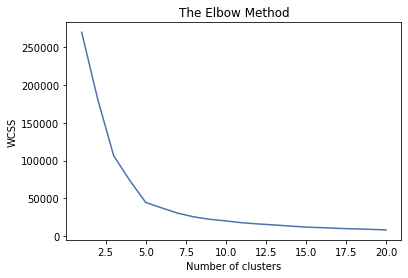

In [48]:
# 시각화로 확인하기
plt.figure()
plt.plot(range(1,21), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# wcss 가 크게 감소하다가 이후 별 차이가 없는 지점을 n의 갯수로 선정.

In [52]:
# k = 5

k = 5
kmeans = KMeans(n_clusters = k)
y_kmeans = kmeans.fit_predict(X)
y_kmeans # 그룹의 결과

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1], dtype=int32)

In [54]:
Group_cluster = pd.DataFrame(y_kmeans)
Group_cluster.columns = ['Group']
full_data = pd.concat([data, Group_cluster], axis=1)
full_data

,ID,Gender,Age,Income,Spend,Group
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,4
197,198,Male,32,126,74,1
198,199,Male,32,137,18,4


In [55]:
kmeans_pred = KMeans(n_clusters=k , random_state=42).fit(X)
kmeans_pred.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

In [57]:
# 군집 0~4 를 cluster1~5 로 설정
labels = [('Cluster' + str(i+1)) for i in range(k)]
labels

['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4', 'Cluster5']

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

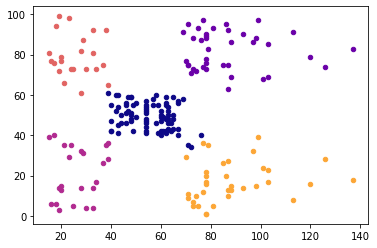

In [58]:
X = np.array(X)
plt.figure()
for i in range(k) :
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i , 1], s = 20, c = cmap(i/k), label= labels[i])

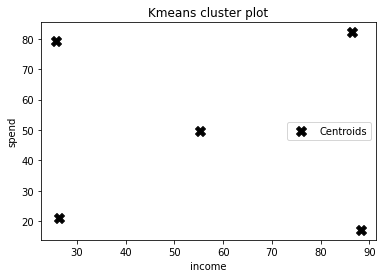

In [59]:
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           s = 100, c='black', label= 'Centroids', marker='X')
plt.xlabel('income')
plt.ylabel('spend')
plt.title('Kmeans cluster plot')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

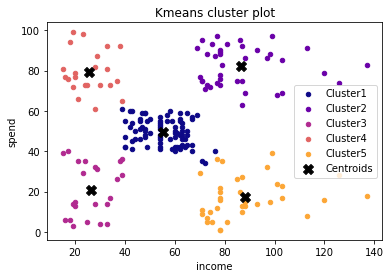

In [60]:
X = np.array(X)
plt.figure()
for i in range(k) :
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i , 1], s = 20, c = cmap(i/k), label= labels[i])

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           s = 100, c='black', label= 'Centroids', marker='X')
plt.xlabel('income')
plt.ylabel('spend')
plt.title('Kmeans cluster plot')
plt.legend()
plt.show()

## 17. DBSCAN

In [62]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
iris = pd.read_csv("")
iris_data = iris[iris.columns[0:4]]
iris_data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'iris.csv'